### 从面向对象的角度来理解matplotlib绘图原理

#### 简介
绘制的图中由一系列的组件组成，每个组件都是一个对象，对象之间包含反应了一张图中的组件的包含。
例如：一个图是一个Figure类对象，它包含坐标Axes类，可能图中有线及Line2D类，可能还要标题Title类。
由于matplotlib采用的是函数式的方式，这些类的包含关系难以直接观察到。

#### pyplot 中的类的总结
``


## matplotlib.pyplot 
##### 设置坐标轴的范围
设置x和y的坐标的范围
plt.xlim((1,2)) 
plt.ylim(...) 

plt.xticks(...)  设置x坐标的刻度

设置x,y坐标标签
plt.xlabel(...) 

`ax.xaxis.set_ticks_position('bottom')` 设置x坐标刻度 名称为bottom  可选的位置 [top，bottom，both，default，none]
`ax.spines['bottom'].set_position(('data', 0))` 设置边框（此处为'bottom'即x轴）的位置


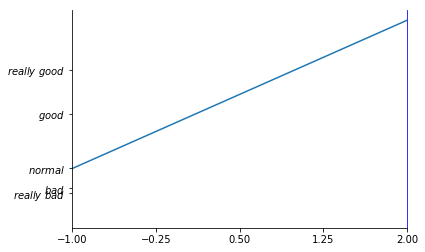

In [22]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-2, 2, 30)
y1 = X * 2 +1

plt.figure()
plt.plot(X, y1)
plt.xlim((-1, 2))

new_ticks = np.linspace(-1, 2, 5)
plt.xticks(new_ticks)
plt.yticks([-2, -1.8, -1, 1.22, 3], ['$really\ bad$', '$bad$', '$normal$', '$good$', '$really\ good$'])

# 获得plt的坐标轴信息，这里设置了边框的信息example:设置边框的颜色为blue
ax = plt.gca()
ax.spines['right'].set_color('blue')
ax.spines['top'].set_color('none')
plt.show()         

##### 通过legend添加图例，向读者展示每个数据对应的图像名称
`plt.legend() 添加图例来解释图像的含义`
#####  给图加标注

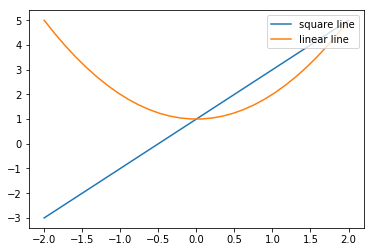

In [38]:
y2 = X**2+1
l1 = plt.plot(X, y1, label='square line')
l2 = plt.plot(X, y2, label='linear line')
# 在图右上角显示图例注释
plt.legend(loc='upper right')
plt.show()

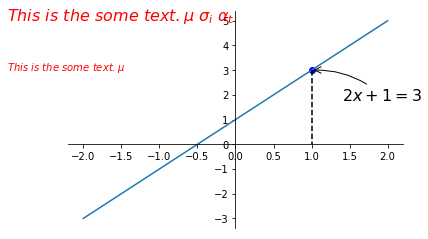

In [67]:
plt.plot(X, y1)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

x0 = 1
y0 = 2*x0+1
plt.plot((x0, x0), (y0, 0), 'k--')
plt.scatter((x0), (y0), color='b')

# 添加注释
plt.annotate(r'$2x+1=%s$'%y0, xy=(x0, y0), xycoords='data', xytext=(+30, -30),
            textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3, rad=.2"))
# 添加文本  r'$This\ is\ the\ some\ text. \mu\ \sigma_i\ \alpha_t$',
plt.text(-3, 3, r'$This\ is\  the\  some\  text. \mu$', fontdict={'color':'r'})
plt.text(-3, 5, r'$This\ is\ the\ some\ text. \mu\ \sigma_i\ \alpha_t$',
         fontdict={'size': 16, 'color': 'r'})
plt.show()

(1024,)


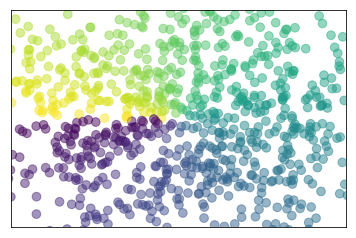

In [71]:
#  散点图
n = 1024    # data size
X = np.random.normal(0, 1, n) # 每一个点的X值
Y = np.random.normal(0, 1, n) # 每一个点的Y值
T = np.arctan2(Y,X) # for color value
print(T.shape)
# 设置点的X,y坐标，颜色、大小以及透明度等属性
plt.scatter(X, Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5, 1.5)
plt.xticks(())  # ignore xticks
plt.ylim(-1.5, 1.5)
plt.yticks(())  # ignore yticks

plt.show()

In [ ]:
# 柱状图
`plt.bar(X, y, facecolor="#", edgecolor="white")`  根据坐X,y生成柱状图，设置前景色和边框的颜色

(256,) (256,) (256, 256) (256, 256)


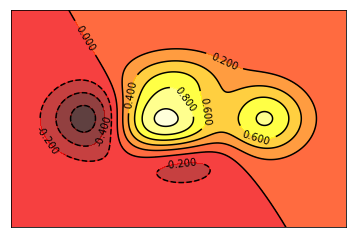

In [86]:
def height(x, y):
    return (1 - x/2 + x**5 + y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)
print(x.shape, y.shape, X.shape, Y.shape)

plt.contourf(X, Y, height(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, height(X,Y), 8, colors='black')
# `plt.clabel`对一个contour 等高线进行标记
plt.clabel(C, inline=True, fontsize=10)
plt.xticks(())
plt.yticks(())
plt.show()

#### 绘制3d的图像
`mpl_toolkits.mplot3d.Axes3D` 进行3d绘制的主要的类

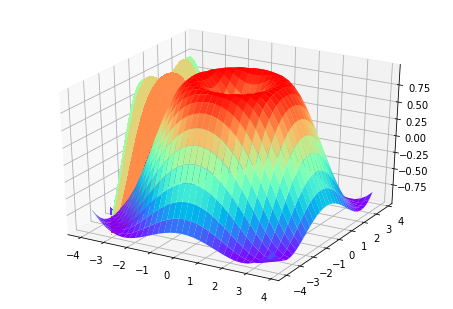

In [112]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# 生成三维物体的表面图像 
# rstride 和 cstride 分别代表 row 和 column 的跨度
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

# 投影
ax.contourf(X, Y, Z, zdir='x', offset=-3, cmap=plt.get_cmap('rainbow'))

plt.show()

####    多子图的构造
`plt.subplot`
直接通过subplot来生成和管理多个子图，适合均分以及指定整个子图分布的情况

`plt.subplot2grid` 
通过gird的形式来管理多个子图
`GridSpec`
利用GridSpec来管理子图
plt.figure()
gs = gridspec.GridSpec(3, 3)
ax = plt.subplot(gs[0, :])

###### 设置图中图
`figure.add_axes([...])` 给图添加坐标系，通过坐标系的边界坐标的约束关系，形成大图、小图的嵌套关系
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax1 = fig.add_axes([left, bottom, width, height])

###### 多坐标系
`Axes.twinx` 坐标系关于x轴形成镜像， 返回一个Axes对象
`Axes.twiny`
在上面生成的坐标系中进行绘图，就可以形成一个图中的多个坐标系的比较

In [136]:
import matplotlib.gridspec as gridspec
# 利用Axes来管理其对应的子图

fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax1.set_title('1')
ax1.plot([1,1], [0,0])

ax2 = fig.add_subplot(3,3,4)
ax2.set_title('2')
ax2.plot([1,1], [0,0])

ax3 = fig.add_subplot(3,3,5)
ax3.set_title('3')
ax3.plot([1,1], [0,0])

ax4 = fig.add_subplot(3,4,9)
ax4.set_title('4')
ax4.plot([1,1], [0,0])
plt.show()
plt.close()

RuntimeError: 

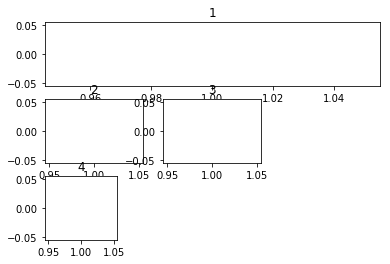

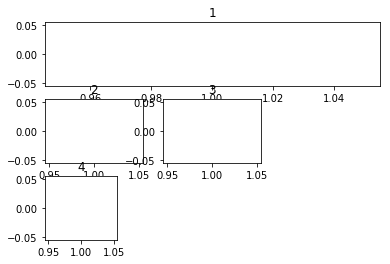

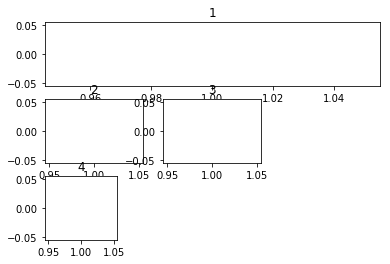

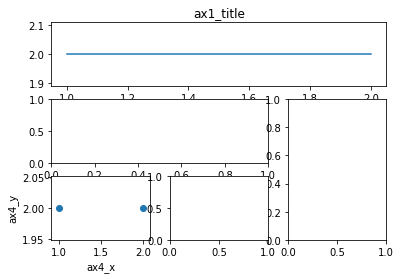

In [137]:
# 利用subplot2grid 来管理子图

plt.figure()
# 参数解释： 第一个数组(3,3)表示3行3列，第二个数组(0,0)表示从(0,0)开始colspan/rowspan表示列、行的跨度
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot([2,1], [2,2])
ax1.set_title("ax1_title")

ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))

ax4.scatter([1, 2], [2, 2])
ax4.set_xlabel('ax4_x')
ax4.set_ylabel('ax4_y')
plt.show()
plt.close()

In [ ]:
# 利用GridSpec来管理子图
plt.figure()
gs = gridspec.GridSpec(3, 3)
ax6 = plt.subplot(gs[0, :])
ax7 = plt.subplot(gs[1, :2])
ax8 = plt.subplot(gs[1:, 2])
ax9 = plt.subplot(gs[-1, 0])
ax10 = plt.subplot(gs[-1, -2])

# 利用plt.subplots()建立多子图窗口
f, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, sharex=True, sharey=True)

In [ ]:
# 图中图  通过将小图的坐标限制在大图的内部，来体现大小图相互包含的关系
fig = plt.figure()
x = [1,2,3,4,5,6,7]
y = [1,3,4,2,5,8,6]

# 大图
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax1 = fig.add_axes([left, bottom, width, height])
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('title')

# 小图 
left, bottom, width, height = 0.2, 0.6, 0.25, 0.25
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(y, x, 'b')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('title inside 1')

plt.show()

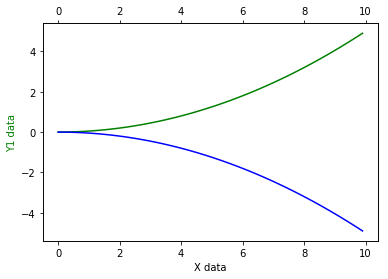

In [139]:
## 同一个图中存在多个坐标系
x = np.arange(0, 10, 0.1)
y1= 0.05 * x**2
y2 = -y1

fig, ax1 = plt.subplots()

# 关于y对称的镜像坐标系
ax2 = ax1.twiny()
ax1.plot(x, y1, 'g-')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')

ax2.plot(x, y2, 'b-')
ax2.set_ylabel('Y2 data', color='b')

plt.show()